In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [0]:
sess = tf.InteractiveSession()

In [0]:
import numpy as np


In [0]:
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [8]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [0]:
df2[cols_to_norm] = df2[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [12]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [13]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
Pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [15]:
df2.shape

(768, 9)

In [0]:
import random

In [0]:
li = ['A' ,'B' , 'C', 'D']

In [0]:
a_list = []

In [0]:
for i in range(768):
  a_list.append(random.choice(li))

In [0]:
df = pd.DataFrame(a_list)

In [21]:
df.head()

,0
0,B
1,D
2,D
3,A
4,A


In [0]:
df = df.rename(columns={"0": "Class"})

In [23]:
df

,0
0,B
1,D
2,D
3,A
4,A
...,...
763,C
764,B
765,D
766,A


In [0]:
frames = [df2,df]

In [0]:
diabetes = pd.concat(frames, axis =1)

In [26]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,D
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,D
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,A
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,A
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,C
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,B
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,D
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,A


In [0]:
diabetes.rename(columns={0:'class'},inplace=True)

In [28]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,D
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,D
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,A
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,A
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,C
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,B
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,D
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,A


In [0]:
 assigend_group = tf.feature_column.categorical_column_with_vocabulary_list('class',['A','B','C','D'])

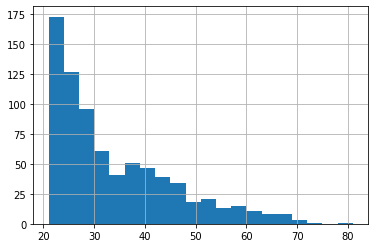

In [30]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [0]:
feat_cols = [num_preg, plasma_gluc,dias_press,tricep,insulin,bmi,Pedigree,age_bucket ]

In [0]:
k_data = diabetes.drop('Outcome',axis = 1)

In [0]:
labels = diabetes['Outcome']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(k_data,labels,test_size=0.3, random_state = 101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr1vrvq6a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f22a991ab70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpr1vrvq6a/mo

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_eval,y=y_eval,batch_size=10,num_epochs=1,shuffle=False)

In [43]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-01T21:37:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr1vrvq6a/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-06-01-21:37:58
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.7976955, auc_precision_recall = 0.6493234, average_loss = 0.5279772, global_step = 1000, label/mean = 0.35064936, loss = 5.081781, precision = 0.63013697, prediction/mean = 0.3721407, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpr1vrvq6a/model.ckpt-1000


In [44]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7976955,
 'auc_precision_recall': 0.6493234,
 'average_loss': 0.5279772,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.081781,
 'precision': 0.63013697,
 'prediction/mean': 0.3721407,
 'recall': 0.56790125}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_eval,batch_size=10,num_epochs=1,shuffle=False)

In [0]:
prediction = model.predict(pred_input_func)

In [47]:
my_pred = list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr1vrvq6a/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
my_pred

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.52145255], dtype=float32),
  'logits': array([0.08586287], dtype=float32),
  'probabilities': array([0.47854748, 0.52145255], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.64385784], dtype=float32),
  'logits': array([0.59214807], dtype=float32),
  'probabilities': array([0.35614216, 0.6438579 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.41253033], dtype=float32),
  'logits': array([-0.35351497], dtype=float32),
  'probabilities': array([0.5874697 , 0.41253033], dtype=float32)

In [49]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvopg48uy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f22a82b15f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigend_group,dimension=4)

In [0]:
feat_cols = [num_preg, plasma_gluc,dias_press,tricep,insulin,bmi,Pedigree,age_bucket,embedded_group_col ] 

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4g9d9z_e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f22a82b1a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
dnn_model.train(input_fn =input_func,steps=1000 )

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp4g9d9z_e/model.ckpt.
INFO:tensorflow:loss = 7.005605, step = 1
INFO:tensorflow:global_step/sec: 124.61
INFO:tensorflow:loss = 6.3377795, step = 101 (0.813 sec)
INFO:tensorflow:global_step/sec: 326.791
INFO:tensorflow:loss = 6.8797503, step = 201 (0.307 sec)
INFO:tensorflow:global_step/sec: 343.024
INFO:tensorflow:loss = 3.9964528, step = 301 (0.282 sec)
INFO:tensorflow:global_step/sec: 359.727
INFO:tensorflow:loss = 5.1749372, step = 401 (0.294 sec)
INFO:tensorfl

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_eval,y=y_eval,batch_size=10,num_epochs=1,shuffle=False)

In [56]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-01T21:38:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4g9d9z_e/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-06-01-21:38:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.82913584, auc_precision_recall = 0.67602485, average_loss = 0.4887884, global_step = 1000, label/mean = 0.35064936, loss = 4.7045884, precision = 0.6923077, prediction/mean = 0.37174895, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp4g9d9z_e/model.ckpt-1000


In [57]:
results

{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82913584,
 'auc_precision_recall': 0.67602485,
 'average_loss': 0.4887884,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7045884,
 'precision': 0.6923077,
 'prediction/mean': 0.37174895,
 'recall': 0.6666667}